# Malaria detection - using CNN

## Dataset
Acknowledgements This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/
* Cell image for detecting whether disease is there are not
* Training set : 12K positive , 12K negative dataset
* Testing set : 1300 postive, 1300 negative dataset
* Different image sizes - avg 130x130x3
* Less number of training data set - Need to augment the data - synthetic data generation
* Since the images are large in size, need to to batch wise training

In [1]:
# General purpose libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

## STEP 1 : Data importing and preprocessing
* Import os library for i/p data directory access
* Analyse the data set - image size, number of examples, number of classes

### Explore data diretory and display input images

In [2]:
import os

In [3]:
data_folder = 'cell_images'
data_path = os.getcwd() + '\\' + data_folder 
data_path

'C:\\Users\\rajasm\\github_projects\\CNN\\cell_images'

In [4]:
os.listdir(data_path)

['test', 'train']

In [5]:
data_path_test = data_path + '\\' + os.listdir(data_path)[0]
data_path_train = data_path + '\\' + os.listdir(data_path)[1]

In [6]:
os.listdir(data_path_test)

['parasitized', 'uninfected']

In [7]:
os.listdir(data_path_train)

['parasitized', 'uninfected']

In [8]:
infected_cell_images_path = data_path_train + '\\' + os.listdir(data_path_train)[0] 
uninfected_cell_images_path = data_path_train + '\\' + os.listdir(data_path_train)[1]

In [9]:
#Infected cell images 
os.listdir(infected_cell_images_path)

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [10]:
# Number of infected, uninfected cell images in training folder
train_size_infected = len(os.listdir(infected_cell_images_path))
train_size_uninfected = len(os.listdir(uninfected_cell_images_path))
(train_size_infected, train_size_uninfected)

(12479, 12479)

In [11]:
#Number of training images
train_size = train_size_infected + train_size_uninfected
train_size

24958

In [12]:
# Show infected cell image
img_path = infected_cell_images_path + '\\' + os.listdir(infected_cell_images_path)[0]
img_path

'C:\\Users\\rajasm\\github_projects\\CNN\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
img_data = mpimg.imread(img_path)
img_data

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [14]:
img_data.shape

(148, 142, 3)

In [15]:
(img_data.min() , img_data.max())

(0.0, 0.9098039)

#### Seems input images are scaled between 0 - 1

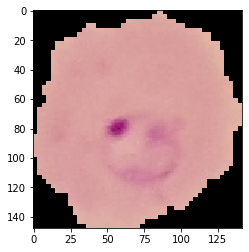

In [16]:
# Show infected cell image
plt.imshow(img_data)

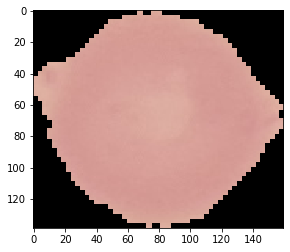

In [17]:
#show un-infected cell image
img_data_uninfected = mpimg.imread(uninfected_cell_images_path + '\\' + os.listdir(uninfected_cell_images_path)[0])
plt.imshow(img_data_uninfected)

In [18]:
img_data_uninfected.shape

(139, 160, 3)

In [19]:
# Number of infected, uninfected cell images in testing folder

infected_cell_images_path_test = data_path_test + '\\' + os.listdir(data_path_test)[0] 
uninfected_cell_images_path_test = data_path_test + '\\' + os.listdir(data_path_test)[1]

test_size_infected = len(os.listdir(infected_cell_images_path_test))
test_size_uninfected = len(os.listdir(uninfected_cell_images_path_test))
test_size = test_size_infected + test_size_uninfected
test_size

2600

### Analyse input image sizes
* Input image sizes can be different
* FInd out mean image Height and Width for further process

In [20]:
#Training image shapes
num_examples_infected = len(os.listdir(infected_cell_images_path))
num_examples_uninfected = len(os.listdir(infected_cell_images_path))

In [21]:
H_list = []
W_list = []
for img in os.listdir(infected_cell_images_path):
    H, W, Color  = mpimg.imread(infected_cell_images_path + '\\' + img).shape
    H_list.append(H)
    W_list.append(W)

In [22]:
img_H = np.mean(H_list)
img_W = np.mean(W_list)
(img_H, img_W)

(134.360205144643, 133.66447632021797)

In [23]:
# we can take mean image size as (130, 130) for feeding it in to CNN layers
img_shape = (130, 130, 3)

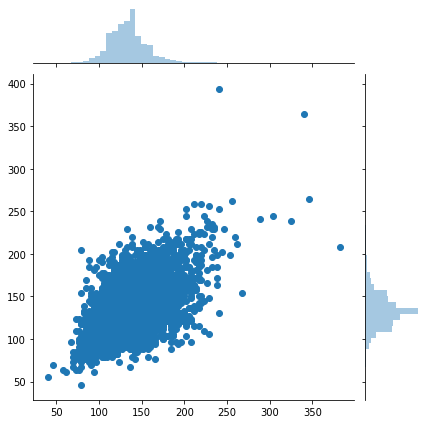

In [24]:
#plotting H, W for all the images
sns.jointplot(H_list,W_list)

#### It is clear that the training images are of different sizes and we can take mean value for model creation

## STEP 2: Create model

conv(3x3x32) pool(2x2) -> conv(3x3x32) pool(2x2) -> conv(3x3x32) pool(2x2) -> flatten -> FC(128) -> o/p (1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [26]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = img_shape)) # For first layer provide image shape
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [27]:
#Early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
callback_earlystop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 2)

In [28]:
#As there are very few number of training images, it is recommneded to use image generator to generate huge set of sythetic data

## STEP 3 : Synthetic data generation
As there are very less number of training examples we can use keras library for image generation
1. Initialize and configure image generator object
2. Create batches of augumented data from the folder / set of input images/ data frame
3. fit the test data with the above calculated parameters
4. Use the image generator directly in training


In [29]:
#Disable GPU acceleration if your system doesnt has NVIDEO GPU
#os.environ['CUDA_VISIBLE_DEVICES']='-1'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
img_gen = ImageDataGenerator(rotation_range = 20, #rotate the image up to 20 deg
                            width_shift_range = 0.05, # up to 5% shift in image width
                            height_shift_range = 0.05, # up to 5% shift in image height
                            rescale = 1/255, # no need to scale as input images are already scaled between 0 - 1 
                            shear_range = 0.1, # shear up to 10%
                            zoom_range = 0.1, # zoom up to 10%
                            horizontal_flip = True, # Allow horizontal flip
                            fill_mode = 'nearest' ) # Fill the missing data with nearest filled value

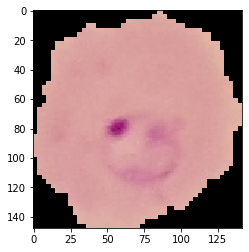

In [31]:
# Show original image 
img_path = infected_cell_images_path + '\\' + os.listdir(infected_cell_images_path)[0]
img_data = mpimg.imread(img_path)
plt.imshow(img_data)

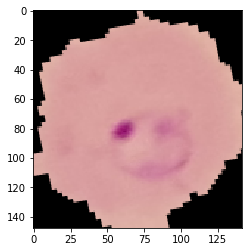

In [32]:
#Randomly transform and see the augumented image
plt.imshow(img_gen.random_transform(img_data))

#### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [33]:
#Generate a batch of augumented images from image generator
#Takes the path to a directory & generates batches of augmented data.

batch_size = 16

new_train_img_path = data_path + '\\' + 'z_new_train'
train_img_gen = img_gen.flow_from_directory(directory = data_path_train, # input training images path
                                              target_size = img_shape[:2], # target image size
                                              color_mode = 'rgb',
                                              class_mode = 'binary',
                                              batch_size = batch_size,
                                              shuffle = True,
                                              interpolation = 'nearest'
                                                 )

Found 24958 images belonging to 2 classes.


In [34]:
len(train_img_gen)

1560

In [35]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [36]:
#Generate a batch of augumented images from image generator
#Takes the path to a directory & generates batches of augmented data.
new_test_img_path = data_path + '\\' + 'z_new_test'
test_img_gen = img_gen.flow_from_directory(directory = data_path_test, # input training images path
                                              target_size = img_shape[:2], # target image size
                                              color_mode = 'rgb',
                                              class_mode = 'binary',
                                              batch_size = batch_size,
                                              shuffle = False,
                                              interpolation = 'nearest'
                                                 )

Found 2600 images belonging to 2 classes.


In [37]:
len(test_img_gen)

163

In [38]:
test_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## STEP 4 : Train model with ImageDataGenerator

In [39]:
train_size
test_size 
model.fit_generator(generator = train_img_gen,
                    epochs = 20,
                    verbose = 1,
                    callbacks = [callback_earlystop],
                    validation_data = test_img_gen,
                   )

Epoch 1/20
1560/1560 [==============================] - 729s 467ms/step - loss: 0.4355 - accuracy: 0.8007 - val_loss: 0.1798 - val_accuracy: 0.9473
Epoch 2/20
1560/1560 [==============================] - 727s 466ms/step - loss: 0.1652 - accuracy: 0.9493 - val_loss: 0.1559 - val_accuracy: 0.9492
Epoch 3/20
1560/1560 [==============================] - 730s 468ms/step - loss: 0.1507 - accuracy: 0.9540 - val_loss: 0.1477 - val_accuracy: 0.9508
Epoch 4/20
1560/1560 [==============================] - 720s 461ms/step - loss: 0.1470 - accuracy: 0.9540 - val_loss: 0.1443 - val_accuracy: 0.9496
Epoch 5/20
1560/1560 [==============================] - 27397s 18s/step - loss: 0.1432 - accuracy: 0.9549 - val_loss: 0.1487 - val_accuracy: 0.9488
Epoch 6/20
1560/1560 [==============================] - 1359s 871ms/step - loss: 0.1390 - accuracy: 0.9550 - val_loss: 0.1351 - val_accuracy: 0.9546
Epoch 7/20
1560/1560 [==============================] - 1367s 876ms/step - loss: 0.1365 - accuracy: 0.9566 - va

In [40]:
from tensorflow.keras.models import load_model
model.save('maleria_detection.h5')

## STEP 5 : Model evaluation

#### Analyze model training history

In [45]:
model_hist_df = pd.DataFrame(model.history.history)

In [48]:
print(model_hist_df)

        loss  accuracy  val_loss  val_accuracy
0   0.435449  0.800745  0.179779      0.947308
1   0.165179  0.949315  0.155903      0.949231
2   0.150721  0.954003  0.147689      0.950769
3   0.147048  0.954003  0.144338      0.949615
4   0.143184  0.954924  0.148720      0.948846
5   0.138998  0.955004  0.135092      0.954615
6   0.136501  0.956647  0.141240      0.952308
7   0.137341  0.957168  0.134366      0.955385
8   0.135850  0.956367  0.136553      0.953846
9   0.132329  0.956206  0.128328      0.954231
10  0.130389  0.956727  0.132441      0.953462
11  0.129076  0.957408  0.138429      0.951538


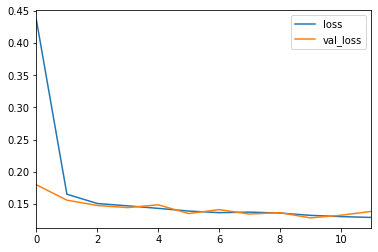

In [53]:
model_hist_df[['loss', 'val_loss']].plot()

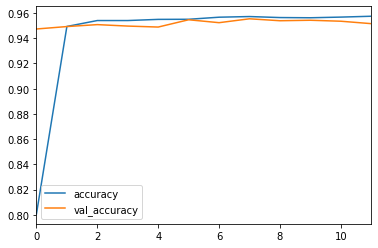

In [54]:
model_hist_df[['accuracy', 'val_accuracy']].plot()

#### Evaluate test image generator images

In [55]:
model.evaluate_generator(test_img_gen)

[0.13959673527296793, 0.9511539]

In [60]:
model.metrics_names

['loss', 'accuracy']

#### Predict output for test dataset

In [64]:
y_pred = model.predict_generator(test_img_gen )
y_pred

array([[6.0610771e-03],
       [1.6760826e-03],
       [6.4241886e-04],
       ...,
       [9.5863968e-01],
       [9.9613512e-01],
       [9.9123502e-01]], dtype=float32)

In [66]:
y_pred = y_pred >= 0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [69]:
y_test = test_img_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1])

#### comapre predictions with label data

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1300
           1       0.94      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [73]:
print(confusion_matrix(y_test, y_pred))

[[1216   84]
 [  38 1262]]


#### Predict output for a single input image

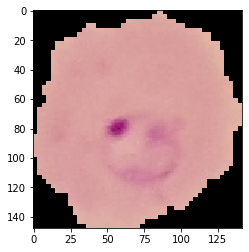

In [75]:
img_path = infected_cell_images_path + '\\' + os.listdir(infected_cell_images_path)[0]
img_data = mpimg.imread(img_path)
plt.imshow(img_data)

In [79]:
#visualize image using keras library
from tensorflow.keras.preprocessing import image 

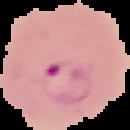

In [82]:
input_img = image.load_img(img_path, target_size=img_shape)
input_img

In [87]:
type(input_img)

PIL.Image.Image

In [91]:
img_data = image.img_to_array(input_img)
img_data.shape

(130, 130, 3)

In [92]:
type(img_data)

numpy.ndarray

In [94]:
img_data = np.expand_dims(img_data, axis  = 0)

In [95]:
img_data.shape

(1, 130, 130, 3)

In [97]:
img_pred = model.predict_classes(img_data) 

In [98]:
img_pred

array([[0]])

In [99]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## Good Bye !!